### Problem Statement

**Initially:**
To clean and preprocess a Twitter text extract dataset for accurate sentiment analysis in future model development.
Classifying tweets as positive, negative, or neutral based on their sentiment.

**Further:**
To train a simple Machine Learning model on the cleaned dataset and make predictions which will be used to evaluate the model's performance. 

**Context:**
My final year project is based on an AI mental health chatbot application which will provide appropriate respomses to users based on the percieved sentiment. This will serve as a basis for building the part of the application which can percieve the sentiment of the message.

### Part 1:
The Twitter Sentiment Analysis dataset contains tweets annotated with sentiment labels, typically used for  tasks like classification. It is commonly used to train machine learning models to understand and predict sentiment (e.g., positive, negative, or neutral).

I will use the tweet (content) as input features and the sentiment label as the target to predict.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Our column names were missing at the start
column_names = ['ID', 'Topic', 'Sentiment', 'Tweet Content']

# assign column names
data = pd.read_csv('twitter.csv', names=column_names, header=None)

print(data.head(5))

ModuleNotFoundError: No module named 'pandas'

In [ ]:
data.columns
# Data.columns lists the columns in the dataframe, which we set above

Index(['ID', 'Topic', 'Sentiment', 'Tweet Content'], dtype='object')

In [ ]:
# Exploratory data analysis
data.dtypes


ID                int64
Topic            object
Sentiment        object
Tweet Content    object
dtype: object

Our dataset consists of objects, which are in this case strings which will need to be processed into something numerical later on.

In [ ]:
data.describe()

,ID
count,74682.000000
mean,6432.586165
std,3740.427870
min,1.000000
25%,3195.000000
50%,6422.000000
75%,9601.000000
max,13200.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             74682 non-null  int64 
 1   Topic          74682 non-null  object
 2   Sentiment      74682 non-null  object
 3   Tweet Content  73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


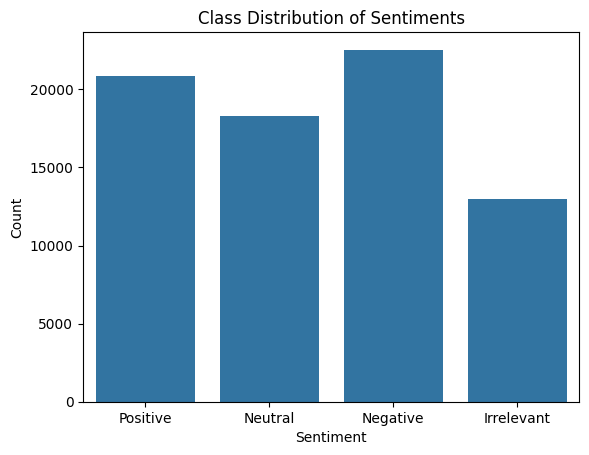

In [ ]:
import seaborn as sns

# Class distribution (visualisation of positive, neutral, and negative sentiments)
sns.countplot(x='Sentiment', data=data)
plt.title("Class Distribution of Sentiments")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()



## Part 2 ##

Data Cleaning

This step includes identifying rows containing NAN values, duplicate values, and incorrect sentiment values.

In [ ]:
rows_with_nan = data[data.isna().any(axis=1)]  # Rows containing NaN 

duplicate_rows = data[data.duplicated(subset=['Tweet Content'], keep='first')]

valid_sentiments = ['positive', 'neutral', 'negative']
invalid_sentiments = data[~data['Sentiment'].isin(valid_sentiments)]

# Combine all filtered rows 
filtered = pd.concat([rows_with_nan, duplicate_rows, invalid_sentiments]).drop_duplicates()

# removing filtered rows and test
data_cleaned = data.drop(filtered.index)

print(data_cleaned.isin(filtered).any().any())  # Should hopefully return False 



False


## Part 3

Preprocessing

1. Converting non-strings to empty strings.
2. Removing URLs, mentions, hashtags, and non-alphabetic characters, which is to remove unnecessary noise in the data.
3. Converting text to lowercase.
4. Removing common stopwords like "a," "the," etc.

This creates a new `Cleaned Tweet` column for cleaned results.


In [ ]:
import re

def clean_tweet(tweet):
    # Handle non-string inputs and missing values by converting to an empty string
    if not isinstance(tweet, str):
        tweet = ""
    
    # Remove URLs
    tweet = re.sub(r'http\S+|www\S+', '', tweet)
    
    # Remove mentions such as @
    tweet = re.sub(r'@\w+', '', tweet)
    
    # Remove hashtags
    tweet = re.sub(r'#\w+', '', tweet)
    
    # punctuation, numbers, etc.
    tweet = re.sub(r'[^a-zA-Z\s]', '', tweet)
    
    # lowercase
    tweet = tweet.lower()
    
    # stopwords or filling words
    stop_words = {'a', 'an', 'the', 'in', 'on', 'at', 'for', 'to', 'of', 'is', 'are', 'am', 'was', 'were', 'be'}
    tweet = ' '.join([word for word in tweet.split() if word not in stop_words])
    
    return tweet

# Apply the function to column
data['Cleaned Tweet'] = data['Tweet Content'].apply(clean_tweet)

# Check the cleaned tweets
print(data[['Tweet Content', 'Cleaned Tweet']].head())

                                       Tweet Content  \
0  im getting on borderlands and i will murder yo...   
1  I am coming to the borders and I will kill you...   
2  im getting on borderlands and i will kill you ...   
3  im coming on borderlands and i will murder you...   
4  im getting on borderlands 2 and i will murder ...   

                                       Cleaned Tweet  
0   im getting borderlands and i will murder you all  
1           i coming borders and i will kill you all  
2     im getting borderlands and i will kill you all  
3    im coming borderlands and i will murder you all  
4  im getting borderlands and i will murder you m...  


### Part 4


**Model Selection and Training**

The Count Vectorizer transforms text into numerical features by counting the frequency of words in a document.

To begin, I will use Logistic Regression, as it is a straightforward machine learning model suitable for binary or multi-class classification tasks, making it a great starting point for this project.

After, I will evaluate and select the most accurate model from SVM, KNN, Naive Bayes, and Logistic Regression.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


X = data["Cleaned Tweet"]  # Features
y = data["Sentiment"]      # Labels

# T(80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Extraction 
vectoriser = CountVectorizer()
X_train_vec = vectoriser.fit_transform(X_train) 
X_test_vec = vectoriser.transform(X_test)       

# Output shapes for verification
print("Training data shape:", X_train_vec.shape)
print("Testing data shape:", X_test_vec.shape)


Training data shape: (59745, 34743)
Testing data shape: (14937, 34743)


## Part 5

Accuracy and metrics
The model is 80% accurate, which leaves room for experimenting with other methods to encode data. 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# train the model
model_simple = LogisticRegression(max_iter=1000, random_state=42)  # Increased max_iter for convergence
model_simple.fit(X_train_vec, y_train)

# Make predictions on the test set
y_test_pred = model_simple.predict(X_test_vec)

# Evaluation on test data
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Testing Accuracy: {test_accuracy:.2f}")

Testing Accuracy: 0.80


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Random Forest model
model_rf = RandomForestClassifier(n_estimators=100)
model_rf.fit(X_train_vec, y_train)

y_test_pred_rf = model_rf.predict(X_test_vec)

test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Random Forest Testing Accuracy: {test_accuracy:.2f}")

Random Forest Testing Accuracy: 0.90


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# K-Nearest Neighbors model
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train_vec, y_train)

y_test_pred = model_knn.predict(X_test_vec)

test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"K-Nearest Neighbors Testing Accuracy: {test_accuracy:.2f}")

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Naive Bayes model
model_NB = MultinomialNB()
model_NB.fit(X_train_vec, y_train)

y_test_pred = model_NB.predict(X_test_vec)

test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Naive Bayes Testing Accuracy: {test_accuracy:.2f}")

### Classification report for Random Forest

In [ ]:
# Generate and print classification report
report = classification_report(y_test, y_test_pred_rf)
print("Classification Report:\n", report)

### Part 6

Making simple predictions on new data:

We can see that the model is complex enough to capture binary or extreme values (bad/ good/ angry/ sad) but may not be able to classify sentiments within complex or neutral sentences.

In [ ]:
# Predictions on New Data
new_tweets = [
    "Absolutely fantastic service!", 
    "I hate how bad this was.", 
    "It's neither good nor bad."
]
new_tweets_vec = vectoriser.transform(new_tweets)
predictions = model_rf.predict(new_tweets_vec)

# Output Predictions
for tweet, sentiment in zip(new_tweets, predictions):
    print(f"Tweet: {tweet} -> Sentiment: {sentiment}")

Tweet: Absolutely fantastic service! -> Sentiment: Positive
Tweet: I hate how bad this was. -> Sentiment: Negative
Tweet: It's neither good nor bad. -> Sentiment: Positive


### Part 7

Saving the model for use in our flask application.

In [ ]:
import joblib
import os

# Where to save both (inside virtual environment)
folder_path = 'models'

# Check if the folder exists, if not, create it
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

# Saves the model to the specified folder
joblib.dump(model_rf, os.path.join(folder_path, 'model.pkl'))

# Saves the vectorizer to the specified folder
joblib.dump(vectoriser, os.path.join(folder_path, 'vectoriser.pkl'))

# Loads the model from the specified folder
loaded_model = joblib.load(os.path.join(folder_path, 'model.pkl'))
print("Model saved.")


Model saved.


In summary, Logistic Regression is a good choice when simplicity and speed/ efficiency is important. Random Forest is better suited for complex, high-dimensional datasets where accuracy is the primary concern, but it may sacrifice some interpretability.